In [16]:
# Still need to work on better way to import 
import sys
sys.path.append('../')
import pestools as pt

# Set options to allow for better display in the iPython notebook
import matplotlib.pyplot as plt
import pandas as pd
% matplotlib inline
plt.rcParams.update({'figure.figsize':[14,8]})
pd.options.display.max_rows = 10
pd.options.display.max_columns = 10
pd.options.display.max_colwidth = 50

<center>**PESTools - A Python toolkit for processing PEST-related information**</center>  <br>

<center>Evan G. Christianson<sup>1</sup>, Andrew T. Leaf<sup>2</sup></center>
<center><sup>1</sup>Barr Engineering, echristianson@barr.com, Minneapolis, MN, USA</center>
<center><sup>2</sup>USGS – Wisconsin Water Science Center, aleaf@usgs.gov, Madison, WI, USA</center>  

<center>**ABSTRACT**</center>

PESTools is an open-source Python package for processing and visualizing information associated with the parameter estimation software PEST. While PEST output can be reformatted for post- processing in spreadsheets or other menu-driven software packages, this approach can be error-prone and time-consuming. Managing information from highly parameterized models with thousands of parameters and observations presents additional challenges. Pestools consists of a set of Python parameters and observations presents additional challenges. PESTools consists of a set of Python object classes to facilitate efficient processing and visualization of PEST-related information. Processing and visualization of observation residuals, objective function contributions, parameter and observation sensitivities, parameter correlation and identifiability, and other common PEST outputs have been implemented. The use of dataframe objects (pandas Python package) facilitates rapid slicing and querying of large datasets, as well as the incorporation of ancillary information such as observation locations and times and measurement types. Pestools’ object methods can be easily be observation locations and times and measurement types. PESTools’ object methods can be easily be scripted with concise code, or alternatively, the use of IPython notebooks allows for live interaction with the information. Pestools is designed to not only streamline workflows, but also provide deeper insight into model behavior, enhance troubleshooting, and improve transparency in the calibration with the information. PESTools is designed to not only streamline workflows, but also provide deeper insight into model behavior, enhance troubleshooting, and improve transparency in the calibration process.

<center>**INTRODUCTION**</center>


In recent years the PEST software suite has become the industry standard for calibrating groundwater flow models and evaluating uncertainty in their predictions. PEST has many advantages, including the ability to robustly handle highly parameterized models with thousands of observations and parameters, as well as numerous  utility programs to perform ancillary analyses and facilitate use with popular modeling software such as MODFLOW. The use of PEST presents many challenges, however, especially in the highly parameterized context. Calibration of a highly parameterized model typically requires managing large volumes of information spread across numerous input and output files. This information can provide valuable insight to the modeler, but can be difficult or impossible to effectively visualize without custom programming. PESTools aims to provide a central platform for managing and visualizing this information, which minimizes the number of intermediate files and custom code required for parameter estimation workflows.

<center>**DEMONSTRATION**</center>

PESTools is designed with flexibility in mind. There are several ways to access and process data through Python object classes, allowing for both interactive exploration or more direct methods for processing only those information the user is interested in.

At the top level of PESTools is the Pest class.  The Pest class input is the path and basename of the PEST run.  A file extention of .pst is assumed for the PEST control file and inclution is optional.

In [2]:
example = pt.Pest(r'../cc/Columbia')

Once the Pest class is created is can be used to access nemerous PEST related inputs and outputs.  Many of the common datasets are exposed as attributs of the PEST class, most commly returned in the form of a Pandas dataframe.

In [3]:
example.parameter_data

,parnme,partrans,parchglim,parval1,parlbnd,parubnd,pargp,scale,offset,dercom
0,kpkpx_tc2,log,factor,2.42,4.300000e-01,1.354000e+01,kp,1,0,1
1,kpkpx_tc3,log,factor,2.42,4.300000e-01,1.354000e+01,kp,1,0,1
2,kpkpx_tc4,log,factor,2.42,4.300000e-01,1.354000e+01,kp,1,0,1
3,kpkpx_tc7,log,factor,2.42,4.300000e-01,1.354000e+01,kp,1,0,1
4,kpkpx_tc8,log,factor,2.42,4.300000e-01,1.354000e+01,kp,1,0,1
...,...,...,...,...,...,...,...,...,...,...
592,r_cr,none,factor,1.00,1.000000e-01,1.000000e+01,rech,1,0,1
593,r_gg,none,factor,1.00,1.000000e-01,1.000000e+01,rech,1,0,1
594,r_lc,none,factor,1.00,1.000000e-01,1.000000e+01,rech,1,0,1
595,sfrc,log,factor,1.00,1.000000e-10,1.000000e+10,sfr_cond,1,0,1


In [4]:
example.observation_data

,obsnme,obsval,weight,obgnme
0,7089222501_b,858.13,0.200000,head_best
1,1089192101_b,893.24,0.200000,head_best
2,2089103101_b,924.60,0.200000,head_best
3,3089103201_b,911.44,0.200000,head_best
4,2089475301_b,729.25,0.200000,head_best
...,...,...,...,...
4594,5406328_marshcr,98200.00,0.000020,headwaters
4595,5405820_wiscons,75700.00,0.000026,headwaters
4596,ccsg12_beavercr,55500.00,0.000018,cc_streams
4597,5406060_blum'sc,40100.00,0.000050,headwaters


Other parts of the PEST control file information can be accessed through the pst subclass

In [5]:
example.pst.prior_information

,equation,obgnme,pilbl,weight
0,1.0 * log(kh_c) = 1.477121,regul_kp,kh_c,1.00000
1,1.0 * log(kh_f) = 1.477121,regul_kp,kh_f,1.00000
2,1.0 * log(kh_ghh) = 1.477121,regul_kp,kh_ghh,1.00000
3,1.0 * log(kh_ghr) = 1.477121,regul_kp,kh_ghr,1.00000
4,1.0 * log(kh_ghs) = 1.477121,regul_kp,kh_ghs,1.00000
...,...,...,...,...
5885,1.0 * log(kzkpz_ms99) - 1.0 * log(kzkpz_ms88) ...,regul_kz6,i6z1126,0.87977
5886,1.0 * log(kzkpz_ms99) - 1.0 * log(kzkpz_ms95) ...,regul_kz6,i6z1127,0.71273
5887,1.0 * log(kzkpz_ms99) - 1.0 * log(kzkpz_ms96) ...,regul_kz6,i6z1128,0.72333
5888,1.0 * log(kzkpz_ms99) - 1.0 * log(kzkpz_ms97) ...,regul_kz6,i6z1129,0.75607


In [6]:
example.pst.nobs

4599

Assuming that PEST has been run, additional PEST outputs are accessiable through the Pest class.

In [7]:
example.res_df

,name,group,measured,modelled,residual,...,weight*measured,weight*modelled,weight*residual,measurement_sd,natural_weight
0,7089222501_b,head_best,858.13,850.3412,7.788813,...,171.626,170.0682,1.557763,8.601969,0.1162525
1,1089192101_b,head_best,893.24,891.3226,1.917429,...,178.648,178.2645,0.383486,8.601969,0.1162525
2,2089103101_b,head_best,924.60,913.3123,11.287680,...,184.920,182.6625,2.257537,8.601969,0.1162525
3,3089103201_b,head_best,911.44,913.5455,-2.105532,...,182.288,182.7091,-0.421106,8.601969,0.1162525
4,2089475301_b,head_best,729.25,734.4137,-5.163696,...,145.850,146.8827,-1.032739,8.601969,0.1162525
...,...,...,...,...,...,...,...,...,...,...,...
10484,i6z1126,regul_kz6,0.00,0.0000,0.000000,...,0.000,0.0000,0.000000,na,na
10485,i6z1127,regul_kz6,0.00,0.0000,0.000000,...,0.000,0.0000,0.000000,na,na
10486,i6z1128,regul_kz6,0.00,0.0000,0.000000,...,0.000,0.0000,0.000000,na,na
10487,i6z1129,regul_kz6,0.00,0.0000,0.000000,...,0.000,0.0000,0.000000,na,na


In [8]:
example.jco_df

,kpkpx_tc2,kpkpx_tc3,kpkpx_tc4,kpkpx_tc7,kpkpx_tc8,...,r_cr,r_gg,r_lc,sfrc,wr_drnc
7089222501_b,0,0,0,0,0,...,0,0.000000,0.000000,-0.815124,0
1089192101_b,0,0,0,0,0,...,0,0.000000,0.000000,-6.731801,0
2089103101_b,0,0,0,0,0,...,0,0.000000,0.000000,-5.073445,0
3089103201_b,0,0,0,0,0,...,0,0.000000,0.000000,-5.073445,0
2089475301_b,0,0,0,0,0,...,0,0.036621,0.024414,-1.616194,0
...,...,...,...,...,...,...,...,...,...,...,...
i6z1126,0,0,0,0,0,...,0,0.000000,0.000000,0.000000,0
i6z1127,0,0,0,0,0,...,0,0.000000,0.000000,0.000000,0
i6z1128,0,0,0,0,0,...,0,0.000000,0.000000,0.000000,0
i6z1129,0,0,0,0,0,...,0,0.000000,0.000000,0.000000,0


PESTools uses the data from the Jacobian matrix and weights assigned by PEST to calculate the parameter sensitivity.  Convenently, there is no need to save or read in the parameter sensitivity file generated by PEST.


In [9]:
parsen = pt.ParSen(r'../cc/Columbia', drop_regul = True)

Parameter sensitivity values can be access from the df attribute (df standing for DataFrame).

In [10]:
parsen.df

,Parameter Group,Sensitivity
kpkpx_tc2,kp,0.000118
kpkpx_tc3,kp,0.000334
kpkpx_tc4,kp,0.000346
kpkpx_tc7,kp,0.000194
kpkpx_tc8,kp,0.000410
...,...,...
r_cr,rech,0.001686
r_gg,rech,0.002309
r_lc,rech,0.001974
sfrc,sfr_cond,0.004233


To access the most sensitive parameters use the head(n) method can be used, where n indicates the number to show.  Similarly, the tail(n) method can be used to show the least sensitive parameters.

In [11]:
parsen.head(10)

r_col         0.022004
kh_cr         0.005336
sfrc          0.004233
kh_ghs        0.004096
kpkpx_ms48    0.003659
kpkpx_tc21    0.003477
kh_gg         0.003434
r_hp          0.003055
kh_hp         0.002518
kpkpx_tc28    0.002397
Name: Sensitivity, dtype: float64

In [12]:
parsen.group('kp')

,Parameter Group,Sensitivity
Parameter,,
kh_cr,kp,0.005336
kh_ghs,kp,0.004096
kpkpx_ms48,kp,0.003659
kpkpx_tc21,kp,0.003477
kh_gg,kp,0.003434
...,...,...
kpkpx_ww34,kp,0.000011
kpkpx_ww89,kp,0.000011
kpkpx_ww99,kp,0.000011


The most sensitive parameters of the group is accessiable with an optional argument n.  Postive n will return the n most sensitive.  Negative n will return the n least sensitive parameters from the group.

In [13]:
parsen.group('kp', n=-5)

,Parameter Group,Sensitivity
Parameter,,
kpkpx_ww34,kp,0.000011
kpkpx_ww89,kp,0.000011
kpkpx_ww99,kp,0.000011
kpkpx_ww5,kp,0.000010
kpkpx_ww77,kp,0.000006


The sum of all parameter sensitivies by group is accesses using the sum_group() method.

In [14]:
parsen.sum_group()

,Sensitivity
Parameter Group,
kp,0.129649
rech,0.031435
kz,0.021706
sfr_cond,0.004238


(<matplotlib.figure.Figure at 0x132f66d8>,
 <matplotlib.axes._subplots.AxesSubplot at 0xca37b38>)

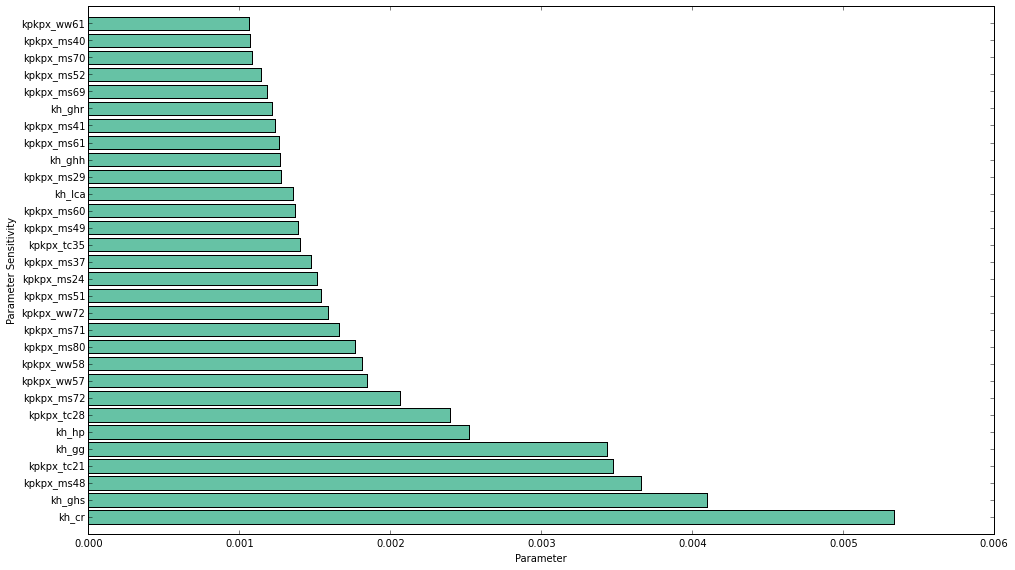

In [15]:
parsen.plot(n=30, group = 'kp')